### Linear Regression
Linear regression is an fundamental or gate machine learning algorithem(s). It can be defind as statistical technique which is used to check the relationship between the input and output variable.The task here to find out the best fit line for our data i.e., __y=mx+c__  here *y* can be represented as 'Dependent variable' ,*m* is an 'coefficient',*c* is an 'intercept' and *x* is an independent variable.
In order to get an better accuracy on the test data we need to decrease the residual sum of squares.

### Assumptions in Linear Regression

1. __linear__: The relationship between the input and output variable is linear
2. __Homoscedasticity__: The variance of residual is the same for any value of x
3. __Independence__: Observations are independent of each other
    

### Steps involved in this process
1. Data Loading.
2. Exploratory data analysis.
3. Feature Engineering.
4. Feature selection.
5. Feature transformation.
6. Model building.
7. Model evaluation.
8. Predictions.
9. Dump the file.

__Task__: Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [1]:
#Let's starting with importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.simplefilter('ignore')

In [2]:
#Load the dataset which is inside the sklearn library
from sklearn import datasets
#Intially our dataset is in array format we need to covert in to dataframe by using pandas library 
boston=datasets.load_boston()

In [3]:
#Convert in to dataframe
df=pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Assigning the column names 
df.columns=boston.feature_names

In [5]:
#concate the target column to the data
df['Target']=boston.target

In [6]:
#First five rows of the data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#least five rows
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
#Get the size of the data
print('No of records:{0}'.format(df.shape[0]))
print('No of features:{0}'.format(df.shape[1]))

No of records:506
No of features:14


In [9]:
#Get the column names
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [10]:
#Get the info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
#Get the descriptive, statistical info of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
#Check any missing values are present in the data
miss_data=pd.DataFrame({"Missing_values":df.isnull().sum(),'Percentage':(df.isnull().sum()/df.shape[0])*100})
miss_data

,Missing_values,Percentage
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


We can see that there is no missing values in our data , Then we can proceed to move ahead for further analysis.

In [13]:
#Gett the unique count,dtype
count_data=pd.DataFrame({"Unique_values":df.nunique(),'Dtype':df.dtypes})
count_data

,Unique_values,Dtype
CRIM,504,float64
ZN,26,float64
INDUS,76,float64
CHAS,2,float64
NOX,81,float64
RM,446,float64
AGE,356,float64
DIS,412,float64
RAD,9,float64
TAX,66,float64


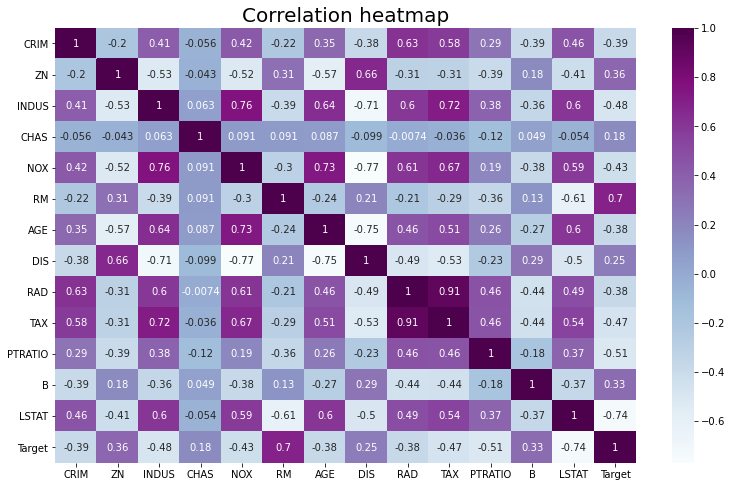

In [14]:
#Check the correlation ship of the variables
plt.figure(figsize=(13,8))
ax=sns.heatmap(df.corr(),annot=True,cmap='BuPu')
ax.set_title('Correlation heatmap',fontsize=20)
plt.show()

In [15]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [16]:
import statsmodels.formula.api as smf
sm=smf.ols(formula='Target~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=df).fit()
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        10:37:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#plot the distribution of the data
def plot_dist(data,variable):
    plt.figure(figsize=(10,7))
    plt.style.use('fivethirtyeight')
    ax=sns.distplot(data[variable],bins=30)
    ax.set_title(variable)
    plt.show()
    return ax

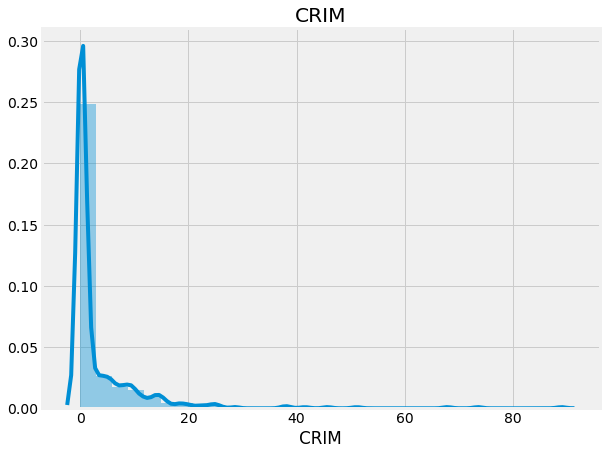

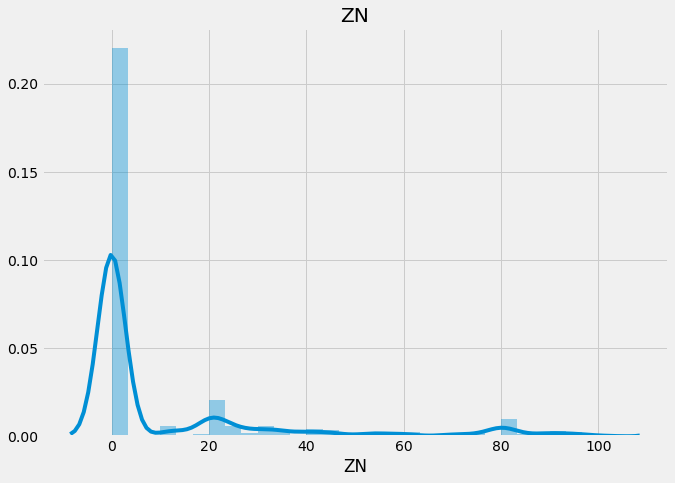

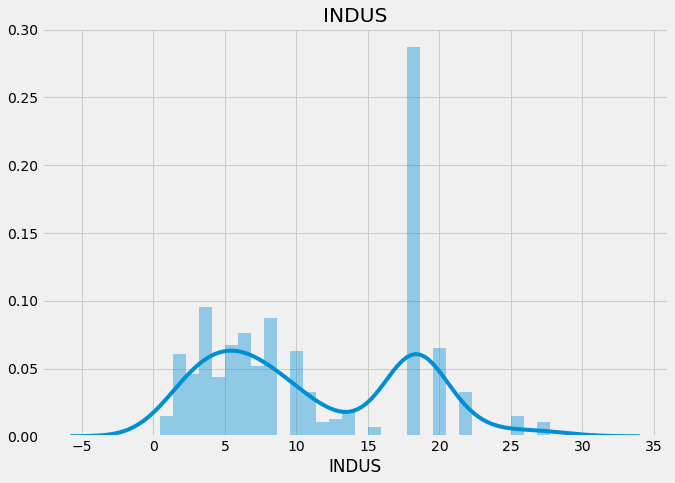

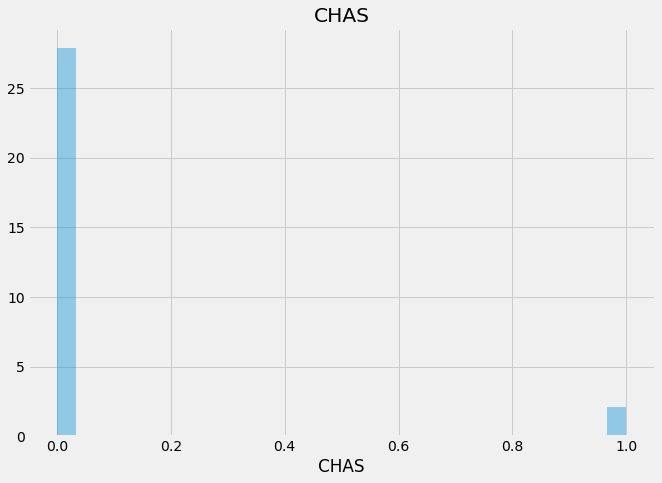

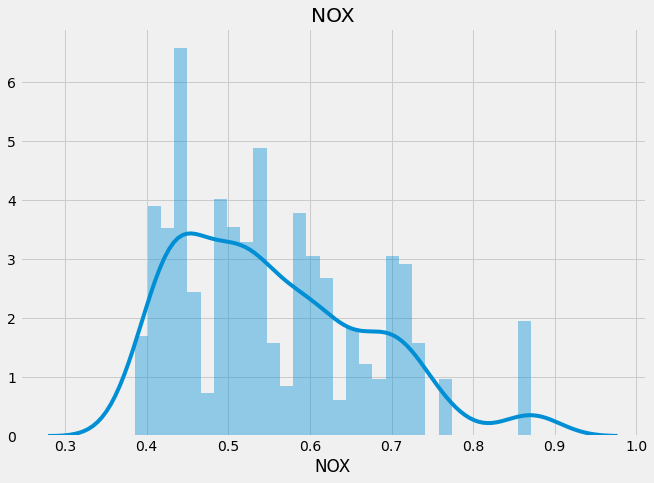

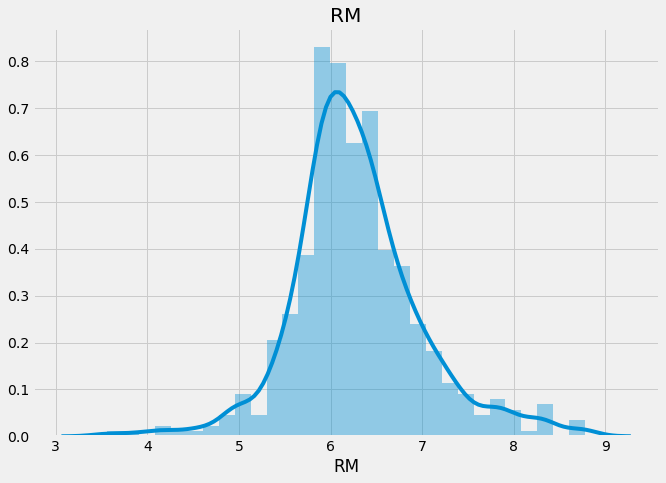

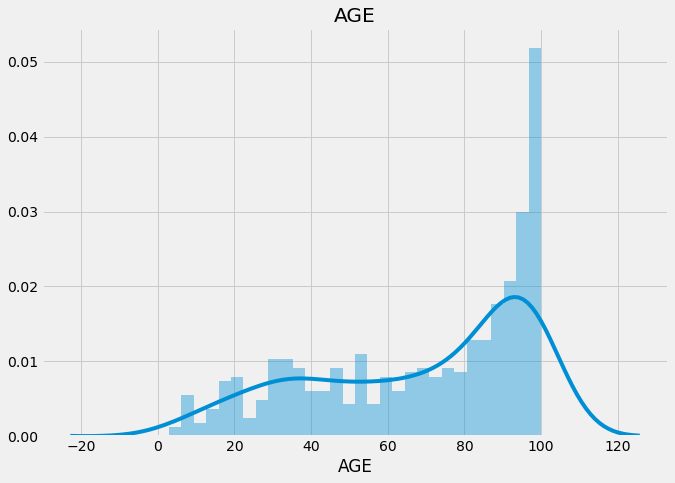

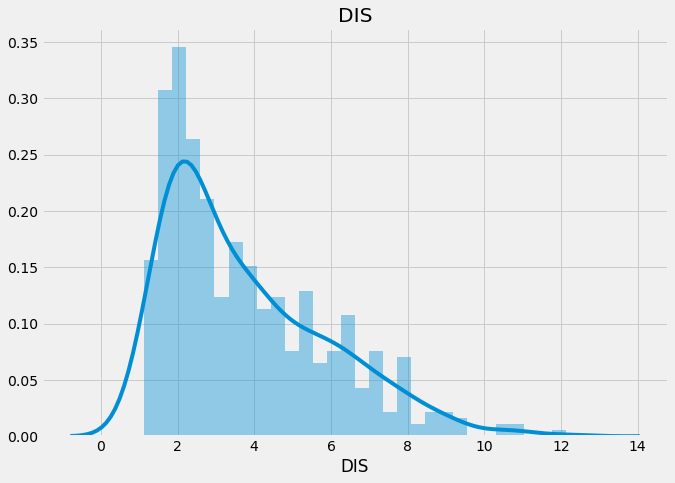

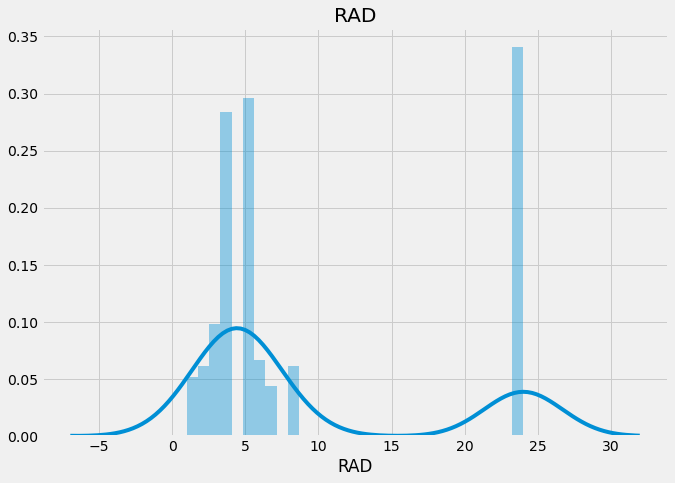

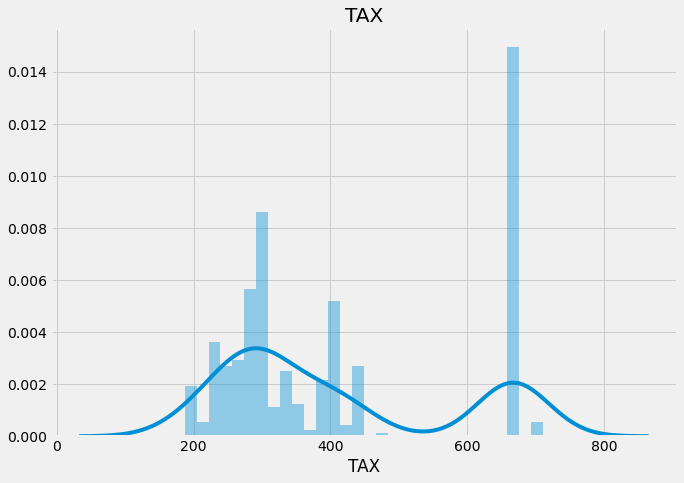

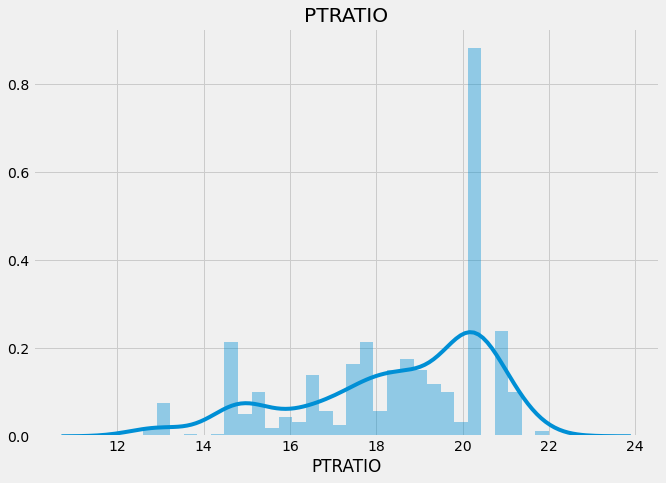

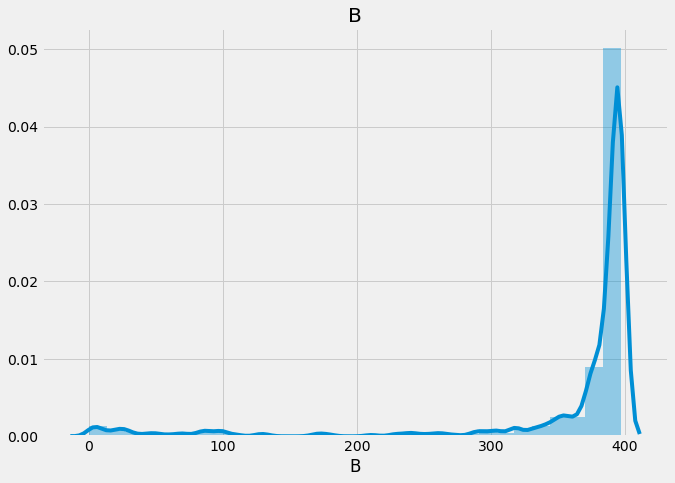

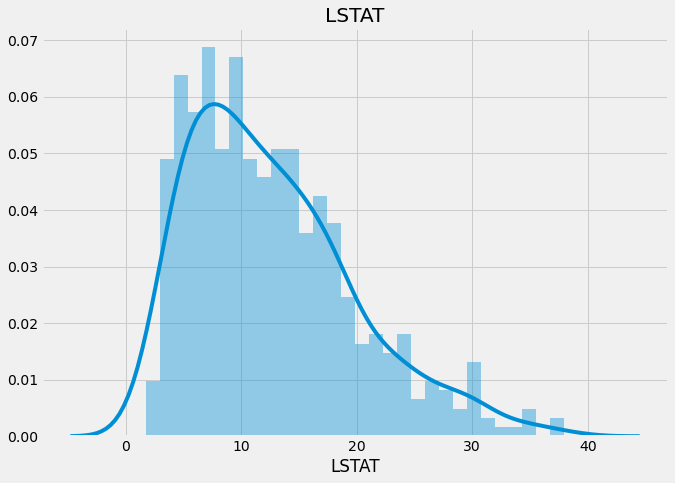

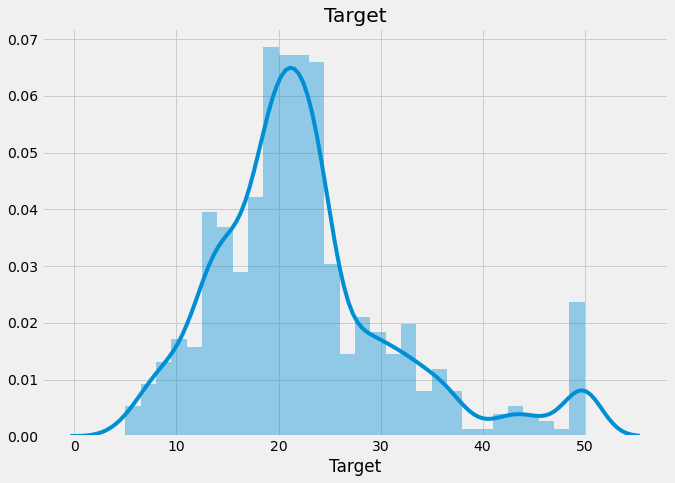

In [18]:
for i in df.columns:
    plot_dist(df,i)

Let's observe the reationships between the variables and to the target variable

In [19]:
#plot the data with the scatter plot
def plot_scatter(data,variable,y='Target'):
    plt.figure(figsize=(9,7))
    plt.style.use('seaborn-whitegrid')
    g=sns.scatterplot(data[variable],data[y],palette='dark')
    g.set_title(variable)
    plt.show()
    return g

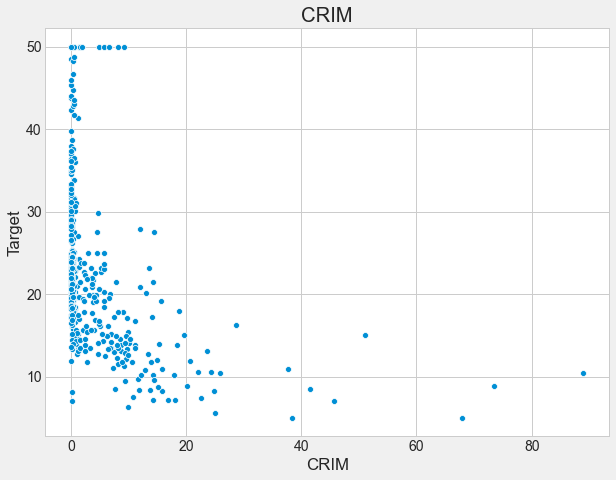

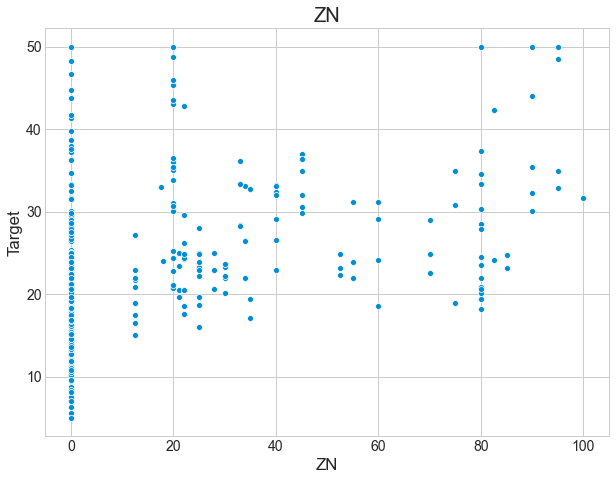

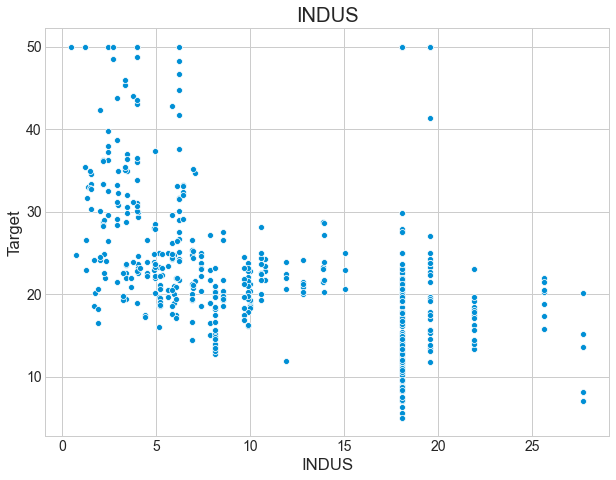

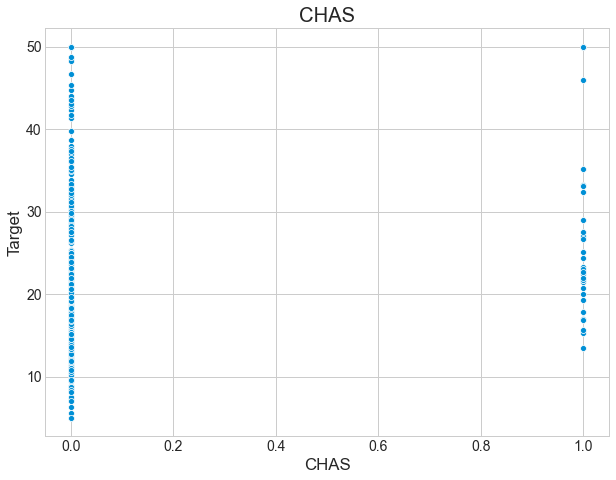

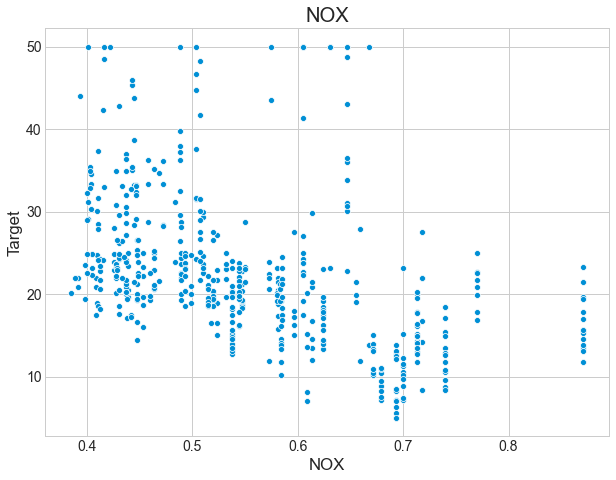

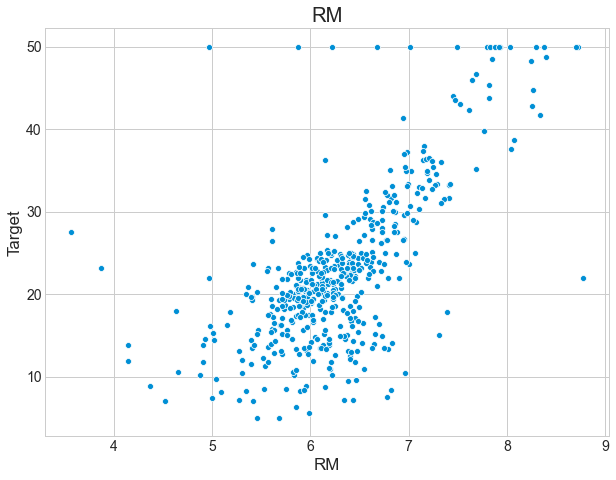

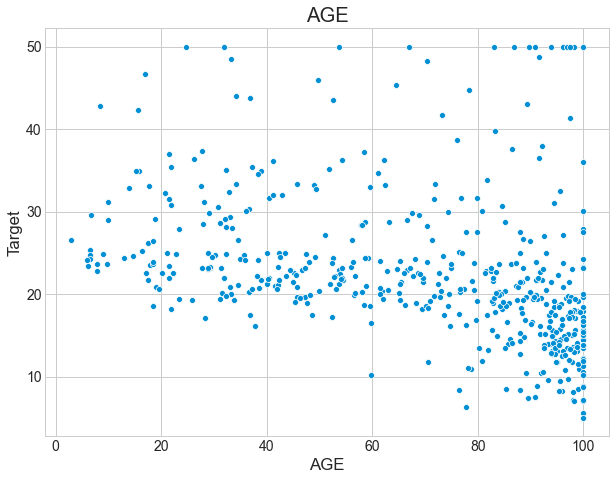

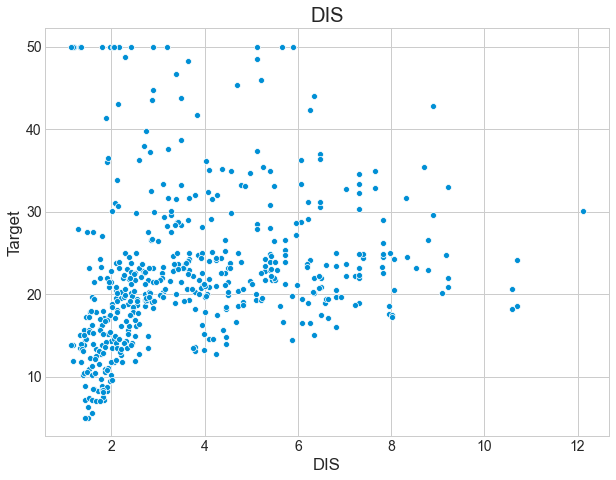

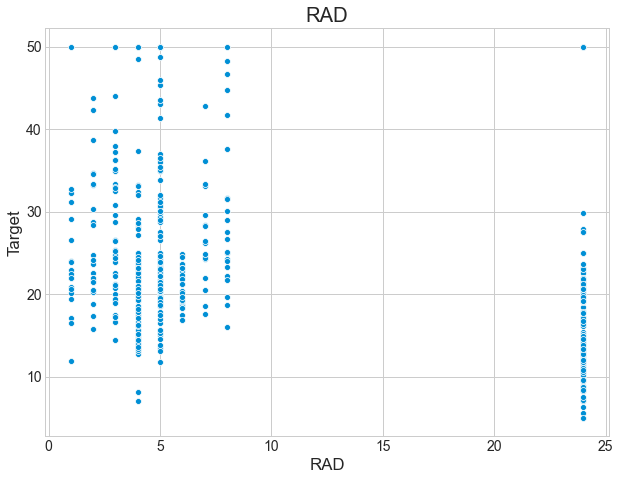

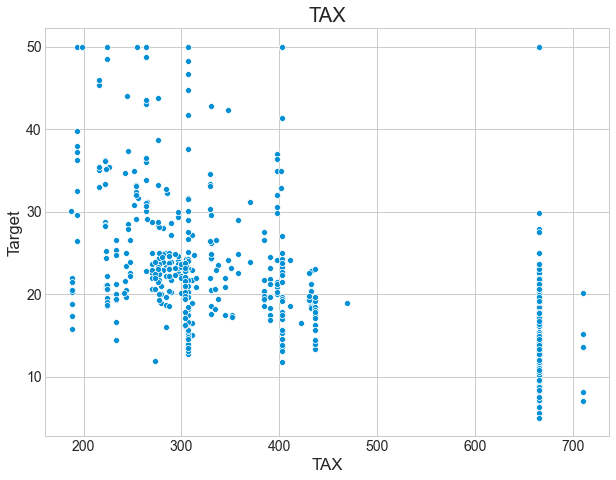

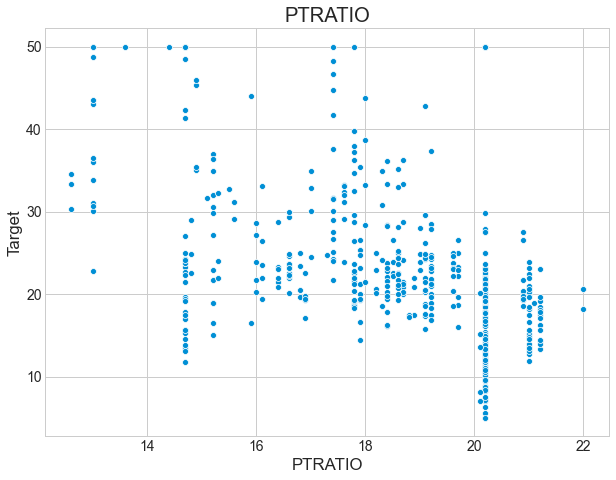

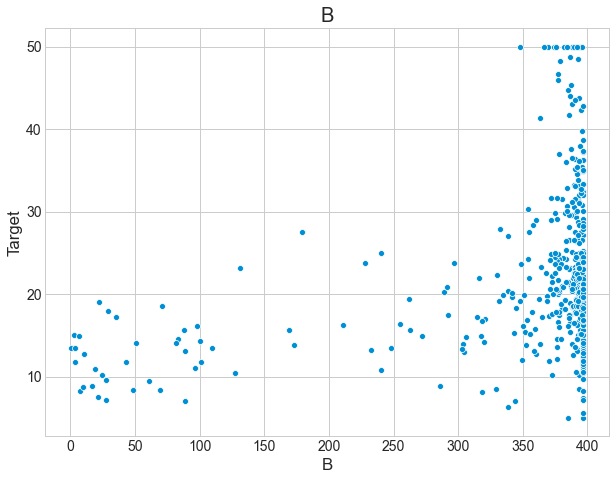

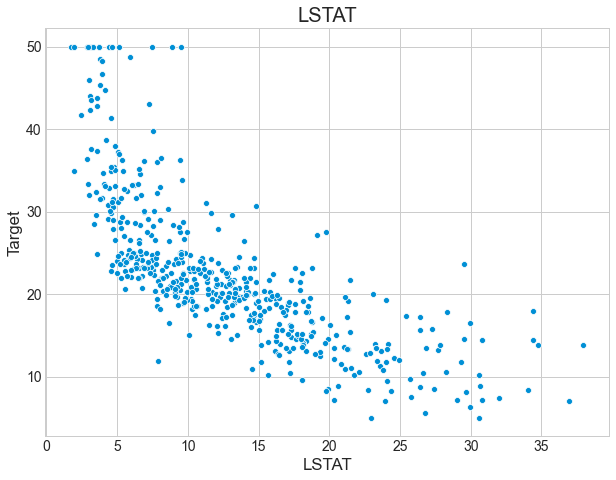

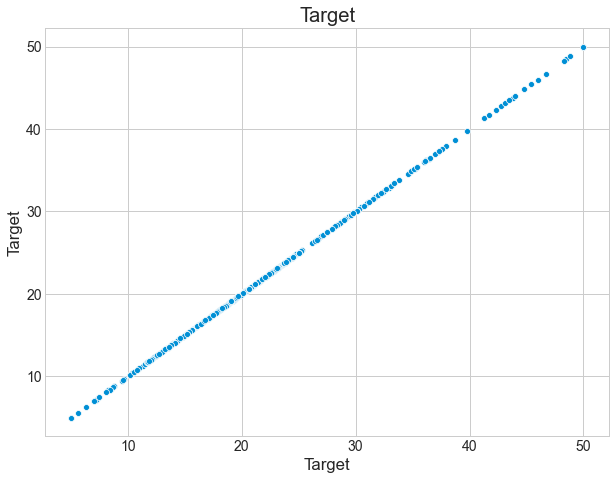

In [20]:
for i in df.columns:
    plot_scatter(df,i)

In [21]:
#Split the data in to x and y
x=df.drop('Target',1)
y=df['Target']

In [22]:
#Scale down the all values in to same vectors
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [23]:
#Check the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=x_scaled
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns

In [24]:
vif

,VIF,features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


As a thumb rule, VIF value greater than 5 means it having a severe multicolinearity.

We can identify the column such as 'TAX' is have high correlation this leads to occur 'Multicolinearity' hence we need to handle that column. 

In [25]:
#Drop the columns which is having a severe multicolinearity
x_new=x.drop('TAX',1)

In [26]:
#Feature selection
from sklearn.tree import ExtraTreeRegressor
extra=ExtraTreeRegressor()
extra.fit(x_new,y)

ExtraTreeRegressor()

In [27]:
extra.feature_importances_

array([0.01556892, 0.0031418 , 0.01486373, 0.00121778, 0.0196626 ,
       0.2178436 , 0.04563427, 0.04893654, 0.0402299 , 0.0384101 ,
       0.01705149, 0.53743928])

In [28]:
extra_best=pd.DataFrame(extra.feature_importances_,index=x_new.columns,columns=['Value'])

In [29]:
extra_best

,Value
CRIM,0.015569
ZN,0.003142
INDUS,0.014864
CHAS,0.001218
NOX,0.019663
RM,0.217844
AGE,0.045634
DIS,0.048937
RAD,0.040230
PTRATIO,0.038410


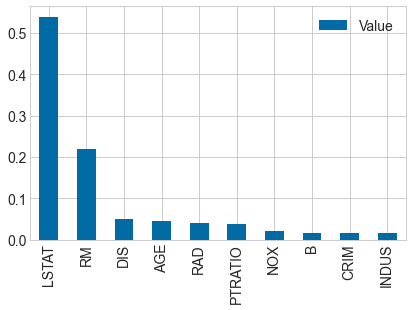

In [30]:
plt.style.use('tableau-colorblind10')
extra_best.nlargest(10,'Value').plot.bar()

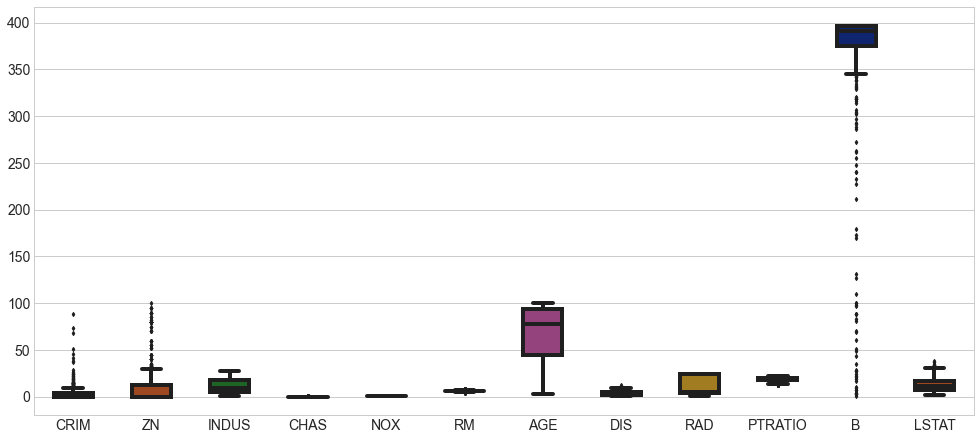

In [31]:
#Check any outiler's are present in the data which makes our result poor
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=x_new,ax=ax,fliersize=3,width=0.5,palette='dark')

In [32]:
#split the data in to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=0)

In [33]:
#Standardize the values in to the same vectors
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [34]:
#Modle building
#Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
#predict on the test data
reg_pred=reg.predict(x_test)
reg_pred[:5]

array([26.90774061, 23.72503516, 28.84409005, 12.04670157, 22.10478459])

In [36]:
#Check the coefficient
reg.coef_

array([-0.96071774,  0.84866834, -0.53545186,  0.66983713, -1.94555307,
        2.64105262, -0.11365328, -2.87821591,  0.77998159, -2.35640329,
        0.7252443 , -3.57255359])

In [37]:
#intercept
reg.intercept_

22.611881188118804

In [38]:
#get the errors of predictions by our model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Mean absolue error: {0}'.format(mean_absolute_error(y_test,reg_pred)))
print('Mean squared error: {0}'.format(mean_squared_error(y_test,reg_pred)))
print('r2_score: {0}'.format(r2_score(y_test,reg_pred)))

Mean absolue error: 3.9528873361338155
Mean squared error: 34.364414410486496
r2_score: 0.5779801896440164


In [39]:
pred_val=pd.DataFrame({'Predicted':reg_pred,'Actual':y_test})

In [40]:
pred_val.head()

,Predicted,Actual
329,26.907741,22.6
371,23.725035,50.0
219,28.844090,23.0
403,12.046702,8.3
78,22.104785,21.2


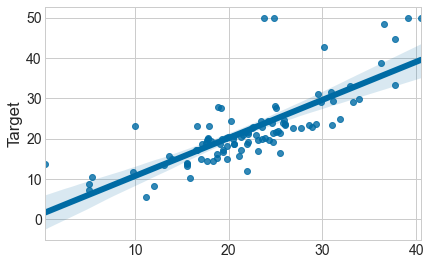

In [41]:
#Check the prediction with an regplot
sns.regplot(reg_pred,y_test)
plt.show()

In [42]:
#Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={"alpha":[0.01,0.001,0.02,0.002,0.03,0.004,0.0001,0.007,0.008]}
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
lasso_grid=RandomizedSearchCV(lasso,param_distributions=parameters,cv=10,n_iter=50,n_jobs=-1,verbose=2)
lasso_grid.fit(x_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.5s finished


RandomizedSearchCV(cv=10, estimator=Lasso(), n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.001, 0.02, 0.002,
                                                  0.03, 0.004, 0.0001, 0.007,
                                                  0.008]},
                   verbose=2)

In [43]:
lasso_pred=lasso_grid.predict(x_test)

In [44]:
print('Mean absolue error: {0}'.format(mean_absolute_error(y_test,lasso_pred)))
print('Mean squared error: {0}'.format(mean_squared_error(y_test,lasso_pred)))
print('r2_score: {0}'.format(r2_score(y_test,lasso_pred)))

Mean absolue error: 3.943651710491692
Mean squared error: 34.6874833503389
r2_score: 0.5740126698981594


In [45]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[0.01,0.001,0.02,0.002,0.03,0.004,0.0001,0.007,0.008]}
ridge_grid=GridSearchCV(ridge,param_grid=parameters,n_jobs=-1,cv=10,verbose=2,scoring='neg_mean_squared_error')
ridge_grid.fit(x_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.3s finished


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.001, 0.02, 0.002, 0.03, 0.004,
                                   0.0001, 0.007, 0.008]},
             scoring='neg_mean_squared_error', verbose=2)

In [46]:
ridge_pred=ridge_grid.predict(x_test)

In [47]:
print('Mean absolue error: {0}'.format(mean_absolute_error(y_test,ridge_pred)))
print('Mean squared error: {0}'.format(mean_squared_error(y_test,ridge_pred)))
print('r2_score: {0}'.format(r2_score(y_test,ridge_pred)))

Mean absolue error: 3.9528773497399055
Mean squared error: 34.3660956469728
r2_score: 0.577959542846587


In [48]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
random_pred=random.predict(x_test)
random_pred[:19]

array([24.407, 28.376, 21.614, 11.242, 20.945, 20.587, 21.296, 19.939,
       20.81 , 18.49 ,  8.586, 15.69 , 14.54 ,  8.512, 47.401, 34.519,
       21.236, 34.471, 26.122])

In [50]:
pd.DataFrame({"Predicted":random_pred,'Actual':y_test}).head()

,Predicted,Actual
329,24.407,22.6
371,28.376,50.0
219,21.614,23.0
403,11.242,8.3
78,20.945,21.2


In [51]:
print('Mean absolue error: {0}'.format(mean_absolute_error(y_test,random_pred)))
print('Mean squared error: {0}'.format(mean_squared_error(y_test,random_pred)))
print('r2_score: {0}'.format(r2_score(y_test,random_pred)))

Mean absolue error: 2.677362745098042
Mean squared error: 19.256013147058834
r2_score: 0.7635222611547172


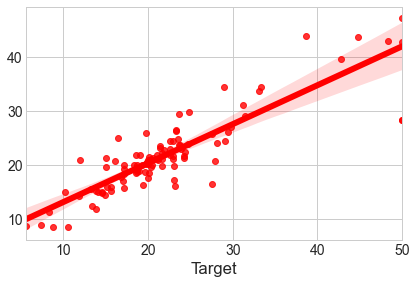

In [52]:
sns.regplot(y_test,random_pred,color='r')

In [53]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [54]:
dt_pred=dt.predict(x_test)
dt_pred[:9]

array([22.2, 20.8, 18.5, 11.7, 21.2, 21.1, 20.7, 19. , 22. ])

In [55]:
print('Mean absolue error: {0}'.format(mean_absolute_error(y_test,dt_pred)))
print('Mean squared error: {0}'.format(mean_squared_error(y_test,dt_pred)))
print('r2_score: {0}'.format(r2_score(y_test,dt_pred)))

Mean absolue error: 3.522549019607842
Mean squared error: 35.479509803921566
r2_score: 0.5642860134289054


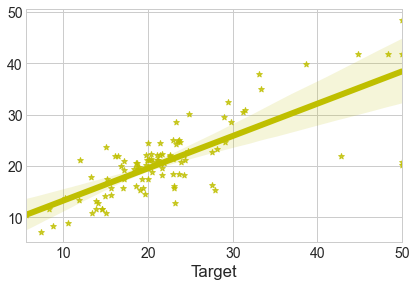

In [56]:
sns.regplot(y_test,dt_pred,color='y',marker='*')

In [57]:
#Suppport vector regressor
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)

SVR()

In [58]:
svm_pred=svm.predict(x_test)
svm_pred[:9]

array([25.48000039, 19.09423844, 24.61399337, 13.33071695, 21.31309229,
       19.55103329, 20.96691371, 20.07077666, 19.24241476])

In [59]:
print('Mean absolue error: {0}'.format(mean_absolute_error(y_test,svm_pred)))
print('Mean squared error: {0}'.format(mean_squared_error(y_test,svm_pred)))
print('r2_score: {0}'.format(r2_score(y_test,svm_pred)))

Mean absolue error: 3.629468424281231
Mean squared error: 41.22975289954902
r2_score: 0.49366887816420624


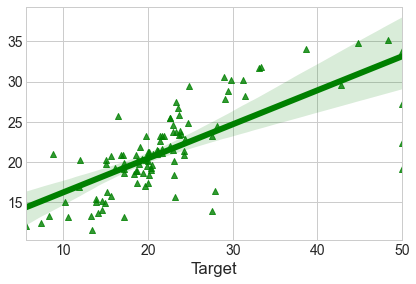

In [60]:
sns.regplot(y_test,svm_pred,color='g',marker='^')

From the above algorthiem's RandomForestRegressor gives a better result as compared to the other algorithems. We predicted the boston house price based on the RandomForestRegressor algorithem

In [61]:
x_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


In [85]:
#Predictions 1
data=np.array([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98]])
predictions=random.predict(data)

In [86]:
print('The Predicted house price is :',predictions)

The Predicted house price is : [22.679]


In [87]:
#Predictions 2
data_2=np.array([[0.09,12,1,0,0.8,8,56,4,4,16,345,8]])
predictions_2=random.predict(data_2)

In [88]:
print('The predicted house price is :',predictions_2)

The predicted house price is : [23.301]


In [97]:
#prediction 3
data_3=x_new.iloc[1:2,:].values
predictions_3=random.predict(data_3)

In [98]:
print('The predicted price is :',predictions_3)

The predicted price is : [22.62]


In [101]:
#Dump the model
import pickle
filename='random.pickle'
pickle.dump(random,open(filename,'wb'))